# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Import Cleaned Dataframe

In [2]:
path=r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 6\causes_of_deaths_analysis'

In [3]:
df=pd.read_csv(os.path.join(path,'02_data','prepared_data','cause_of_deaths_2010_2019.csv'))
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,4130,...,3413,4693,484,1932,7379,6969,3304,6367,451,2482
1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,3550,4785,483,1805,7432,6916,3318,6370,448,2365
2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,3682,4846,482,1667,7494,6878,3353,6398,445,2264
3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,4379,...,3827,4945,494,1651,8054,6859,3413,6476,460,2204
4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,4420,...,3986,5055,496,1579,8087,6851,3454,6522,463,2134


In [4]:
matplotlib.__version__

'3.7.1'

In [5]:
# Display the charts automatically
%matplotlib inline

In [6]:
# Call the columns
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [7]:
# Rename columns with abbreviations
df.rename(columns={
    'Country/Territory':'Country',
    'Alzheimer\'s Disease and Other Dementias': 'Alzheimer\'s Dis. & Oth.',
    'Parkinson\'s Disease': 'Parkinson\'s Dis.',
    'Nutritional Deficiencies': 'Nutr. Def.',
    'Drowning': 'Drown.',
    'Interpersonal Violence': 'Interp. Viol.',
    'Maternal Disorders': 'Mat. Dis.',
    'Drug Use Disorders': 'Drug Use Dis.',
    'Cardiovascular Diseases': 'Cardiovascular Dis.',
    'Lower Respiratory Infections': 'Low. Resp. Inf.',
    'Neonatal Disorders': 'Neonatal Dis.',
    'Alcohol Use Disorders': 'Alcohol Use Dis.',
    'Exposure to Forces of Nature': 'Exp. to Forces of Nat.',
    'Diarrheal Diseases': 'Diarr. Dis.',
    'Environmental Heat and Cold Exposure': 'Env. Heat and Cold Exp.',
    'Conflict and Terrorism': 'Conf. and Terr.',
    'Chronic Kidney Disease': 'Chr. Kidney Dis.',
    'Protein-Energy Malnutrition': 'Prot.-Ener. Malnutr.',
    'Road Injuries': 'Road Inj.',
    'Chronic Respiratory Diseases': 'Chr. Resp. Dis.',
    'Cirrhosis and Other Chronic Liver Diseases': 'Cirr. and Chr. Liver Dis.',
    'Digestive Diseases': 'Digestive Dis.',
    'Fire, Heat, and Hot Substances': 'Fire, Heat, Hot Subs.',
    'Acute Hepatitis': 'Acute Hep.',
}, inplace=True)

# Display the DataFrame after renaming columns
df.columns


Index(['Country', 'Code', 'Year', 'Meningitis', 'Alzheimer's Dis. & Oth.',
       'Parkinson's Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.'],
      dtype='object')

In [8]:
sub=df[['Meningitis', 'Alzheimer\'s Dis. & Oth.',
       'Parkinson\'s Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.']]

<Figure size 640x480 with 0 Axes>

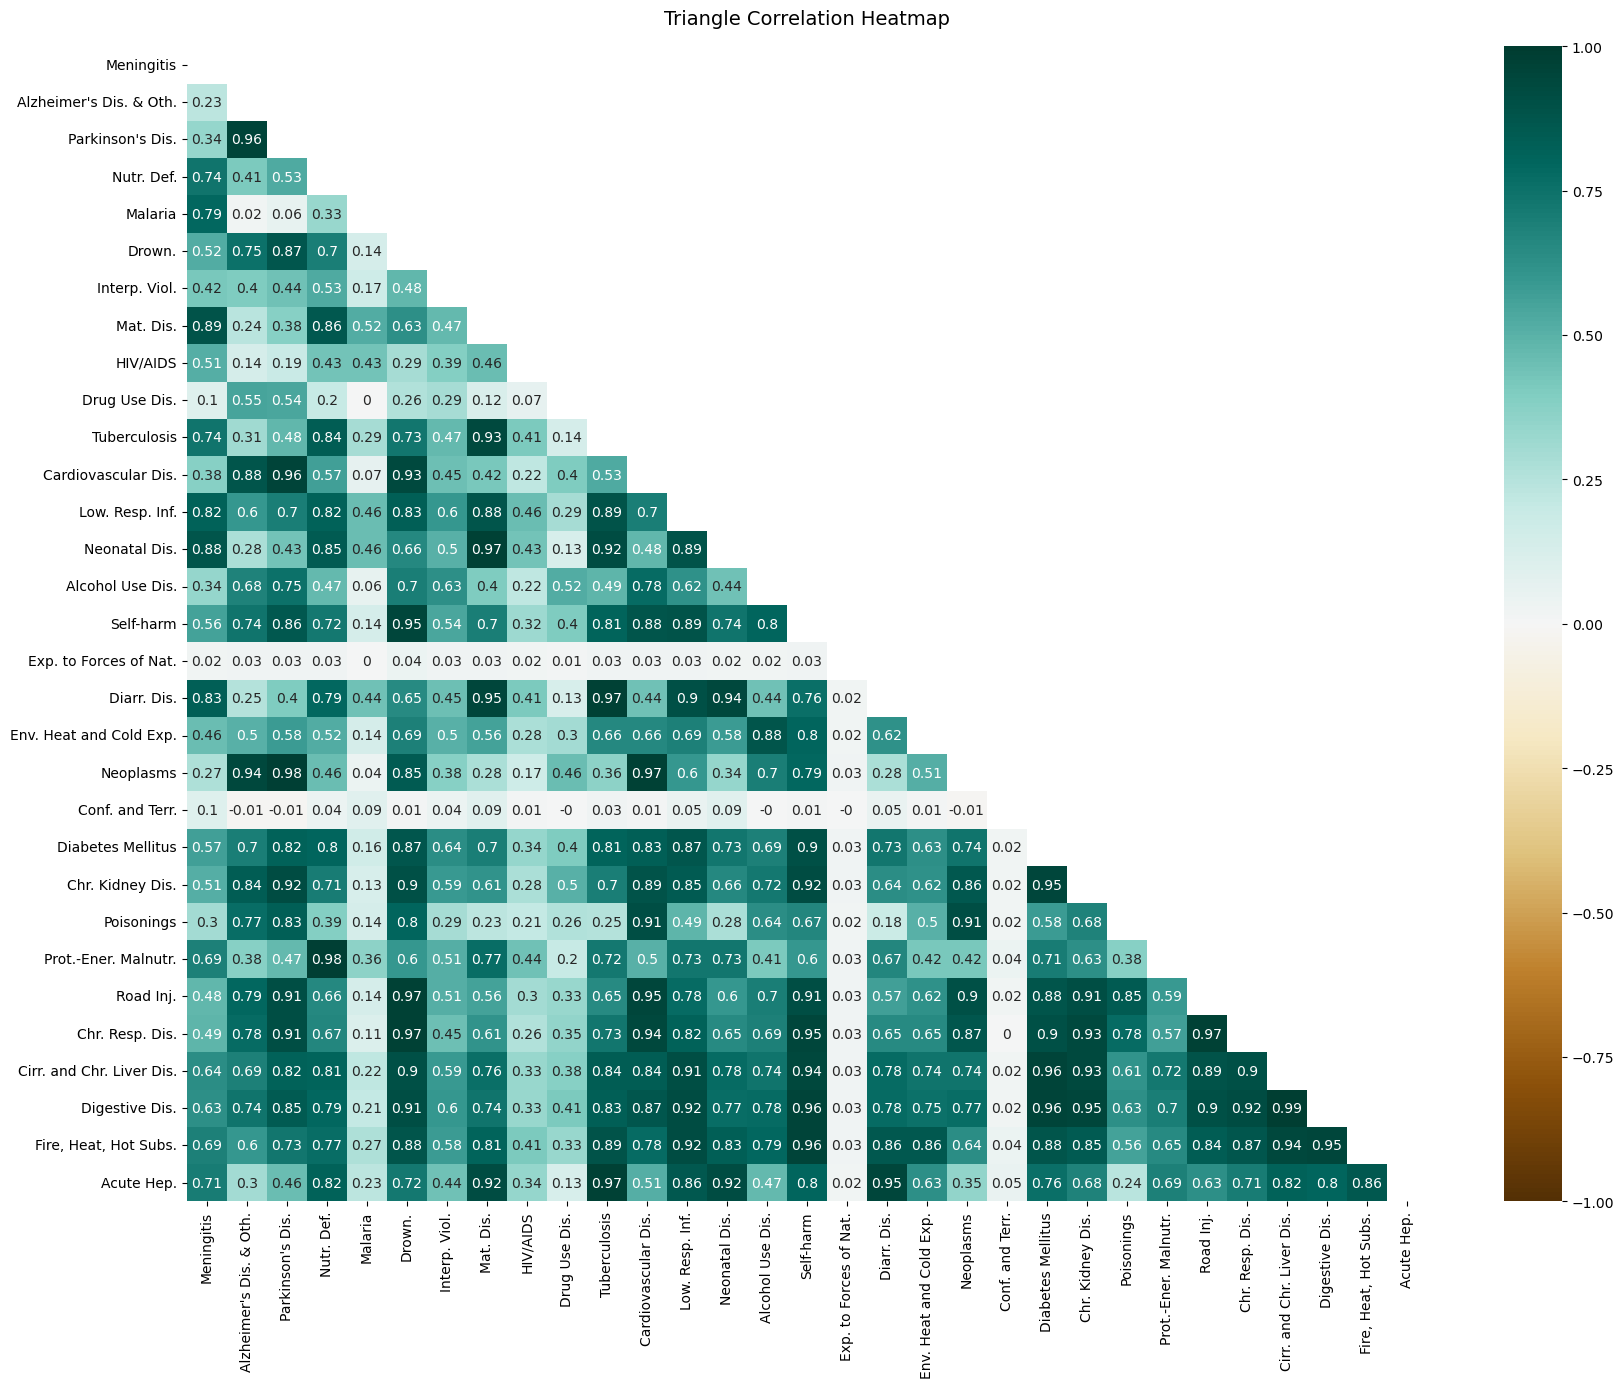

In [9]:
plt.figure()
# define the mask to set the values in the upper triangle to True
fig, ax = plt.subplots(figsize=(20,15))
mask = np.triu(np.ones_like(sub.corr(), dtype=bool))

heatmap = sns.heatmap(sub.corr().round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',xticklabels=True, yticklabels=True,ax=ax)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16);


Here we have a beautiful heatmap that illustrates the correlation between various causes of death. There might be several reasons behind these correlations, such as shared underlying causes, environments conducive to the occurrence of different illnesses, or lifestyle factors and public health interventions that contribute to mortality. For instance, genetic predisposition can play a role in conditions like Alzheimer's Disease, Parkinson's Disease, and Neoplasms, as evidenced by a robust correlation coefficient of 0.9.

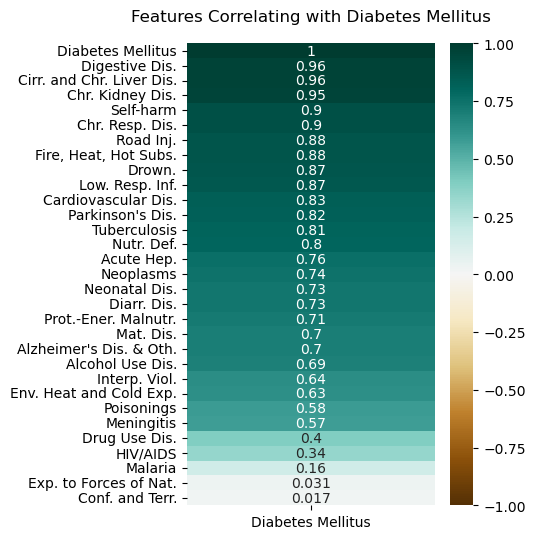

In [15]:
# List the death causes that have the strongest correlation with 'Diabetes Mellitus'
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(sub.corr()[['Diabetes Mellitus']].sort_values(by='Diabetes Mellitus', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Diabetes Mellitus', fontdict={'fontsize':12}, pad=16);

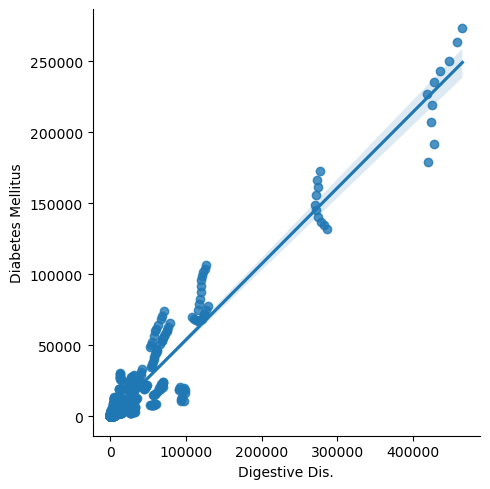

In [21]:
# Create a scatterplot for the 'Diabetes Mellitus' with the strongest correlations
sns.lmplot(y = 'Diabetes Mellitus', x = 'Digestive Dis.', data = sub)

The correlation between diabetes and digestive disorders, as well as cirrhosis and chronic liver diseases, and chronic kidney diseases might be explained by the same underlying conditions, such as metabolic syndrome, inflammatory processes, and obesity.

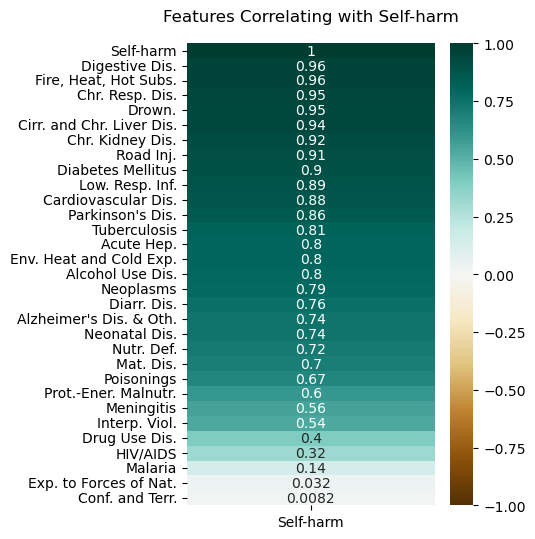

In [16]:
# List the death causes that have the strongest correlation with 'Self harm'
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(sub.corr()[['Self-harm']].sort_values(by='Self-harm', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Self-harm', fontdict={'fontsize':12}, pad=16);

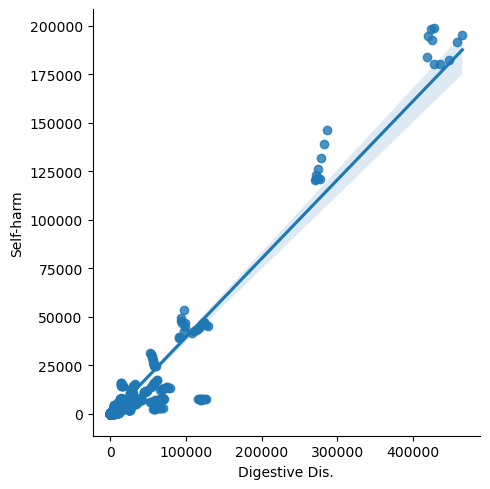

In [20]:
# Create scatterplot
sns.lmplot(y='Self-harm',x='Digestive Dis.', data=sub)

We can assume that individuals with critical health conditions may be more susceptible to self-harming behaviors, or that the underlying factors contributing to these illnesses might also act as triggers for self-harm.

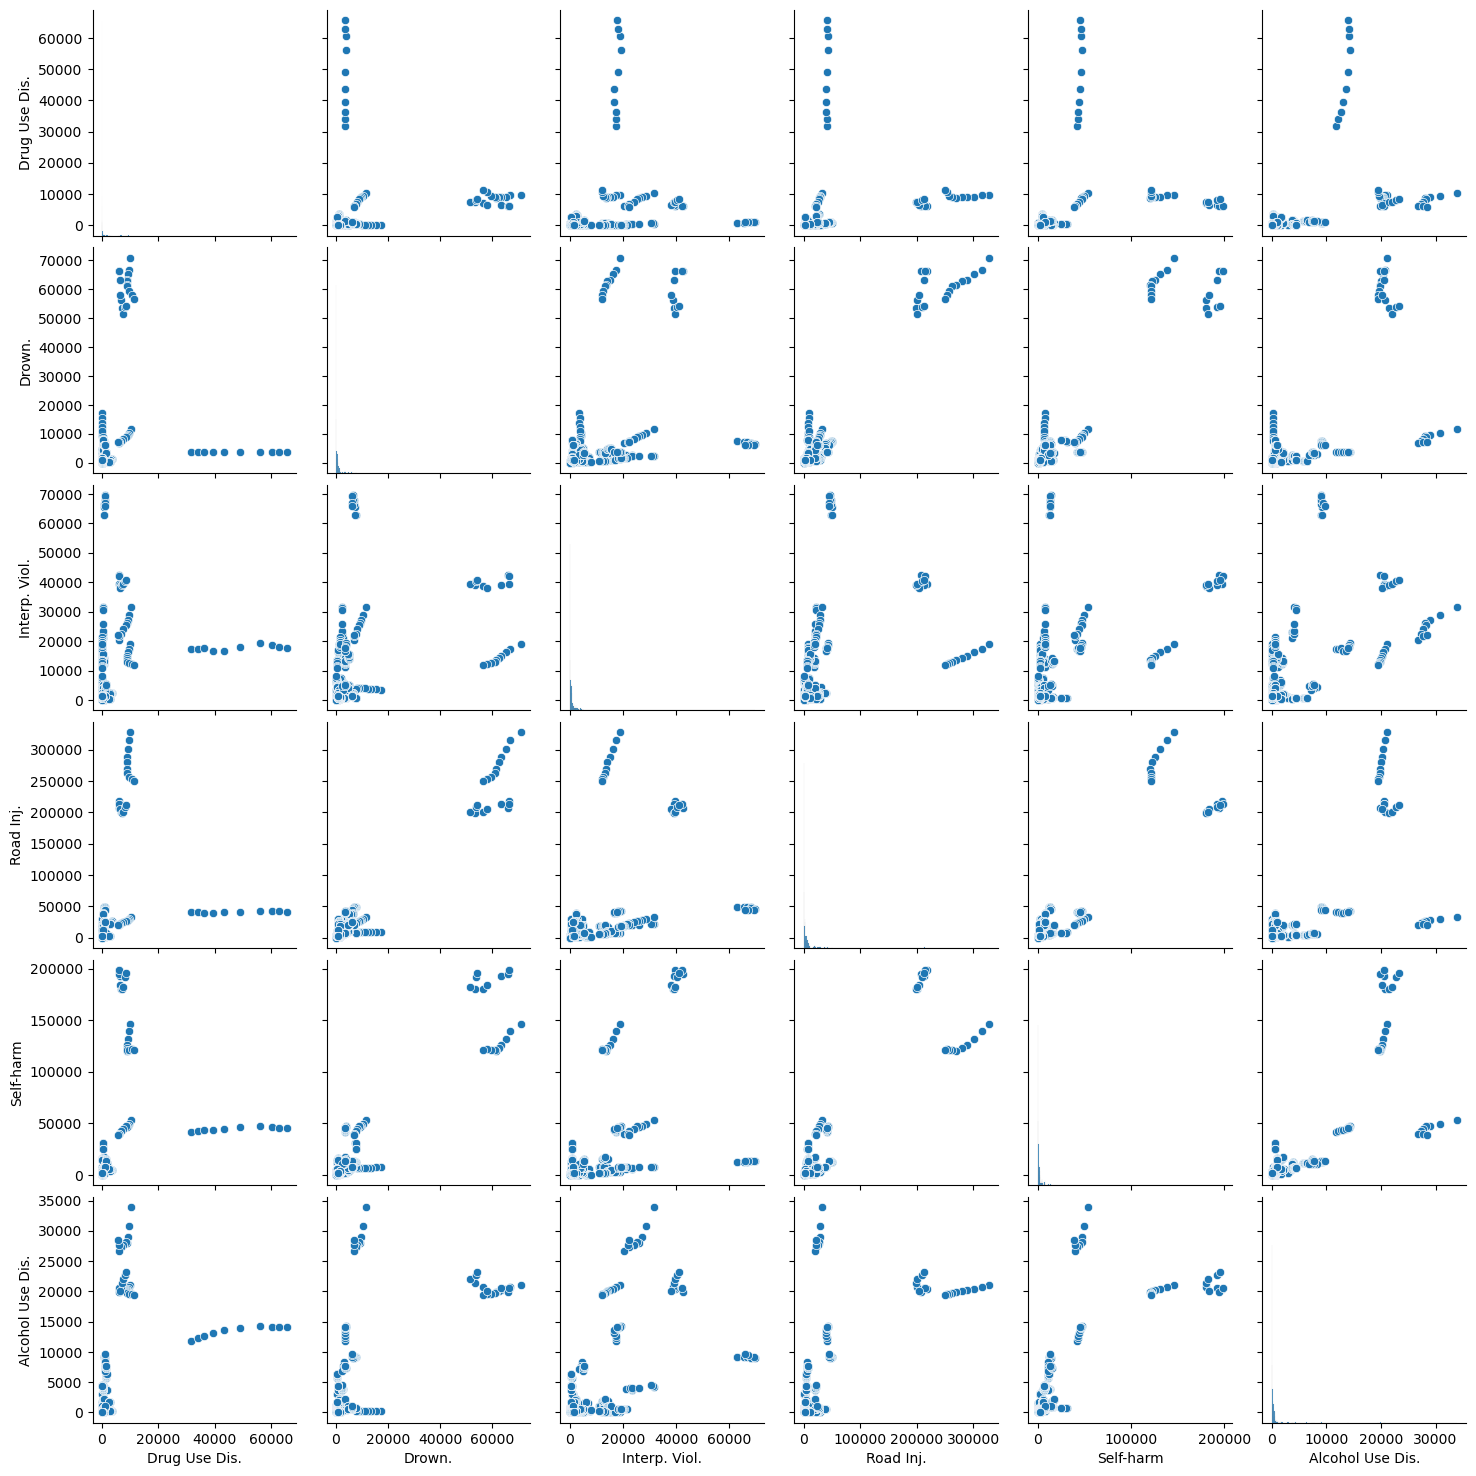

In [27]:
# Create a pair plot to analyse correlation between mortality and external causes
sub2=df[['Drug Use Dis.','Drown.', 'Interp. Viol.','Road Inj.','Self-harm','Alcohol Use Dis.']]
pairplot=sns.pairplot(sub2)

Apparently, there isn't a strong correlation between mortality and external causes attributed to human actions.

# Import Data Set Economic Growth
For the scope of this exercise, I am importing a dataset on world economic growth, containing relevant information for the years 2010-2019. The preparation steps for this dataset, including importing only the relevant columns, cleaning, renaming, and dropping irrelevant rows, can be found in the script '01.5_economic_data_cleaning'.

In [ ]:
# Import data
df_eco=pd.read_csv(os.path.join(path,'02_data','prepared_data','economic_data_cleaned.csv'),index_col=0)

In [33]:
# View data
df_eco.head()

,Code,Year,GDP per capita,Population
50,AFG,2010,543.303042,29185507.0
51,AFG,2011,591.162759,30117413.0
52,AFG,2012,641.871479,31161376.0
53,AFG,2013,637.165523,32269589.0
54,AFG,2014,613.856689,33370794.0


In [41]:
# Check the dimensions
df_eco.shape

(2472, 4)

# Merging dataframes

In [46]:
#merging df_prods with orders_products_combined
df_merged = df.merge(df_eco, on=['Code', 'Year'],how='inner', indicator=True)

In [47]:
df_merged.head()

,Country,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,...,Prot.-Ener. Malnutr.,Road Inj.,Chr. Resp. Dis.,Cirr. and Chr. Liver Dis.,Digestive Dis.,"Fire, Heat, Hot Subs.",Acute Hep.,GDP per capita,Population,_merge
0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,4130,...,1932,7379,6969,3304,6367,451,2482,543.303042,29185507.0,both
1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,1805,7432,6916,3318,6370,448,2365,591.162759,30117413.0,both
2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,1667,7494,6878,3353,6398,445,2264,641.871479,31161376.0,both
3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,4379,...,1651,8054,6859,3413,6476,460,2204,637.165523,32269589.0,both
4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,4420,...,1579,8087,6851,3454,6522,463,2134,613.856689,33370794.0,both


In [48]:
df_merged['_merge'].value_counts()

_merge
both          1928
left_only        0
right_only       0
Name: count, dtype: int64

In [49]:
df_merged.shape

(1928, 37)

In [50]:
df_merged.columns

Index(['Country', 'Code', 'Year', 'Meningitis', 'Alzheimer's Dis. & Oth.',
       'Parkinson's Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population', '_merge'],
      dtype='object')

In [59]:
# Drop '_merge' column
df_merged.drop('_merge',axis=1,inplace=True)
df_merged.head()

,Country,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,...,Poisonings,Prot.-Ener. Malnutr.,Road Inj.,Chr. Resp. Dis.,Cirr. and Chr. Liver Dis.,Digestive Dis.,"Fire, Heat, Hot Subs.",Acute Hep.,GDP per capita,Population
0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,4130,...,484,1932,7379,6969,3304,6367,451,2482,543.303042,29185507.0
1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,483,1805,7432,6916,3318,6370,448,2365,591.162759,30117413.0
2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,482,1667,7494,6878,3353,6398,445,2264,641.871479,31161376.0
3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,4379,...,494,1651,8054,6859,3413,6476,460,2204,637.165523,32269589.0
4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,4420,...,496,1579,8087,6851,3454,6522,463,2134,613.856689,33370794.0


In [70]:
# Save new dataframe
df_merged.to_csv(os.path.join(path,'02_data','prepared_data','df_merged.csv'))

# Analyze Correlation Between Causes of Death and GDP

In [60]:
sub_merged=df_merged[['Meningitis', 'Alzheimer\'s Dis. & Oth.',
       'Parkinson\'s Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population']]

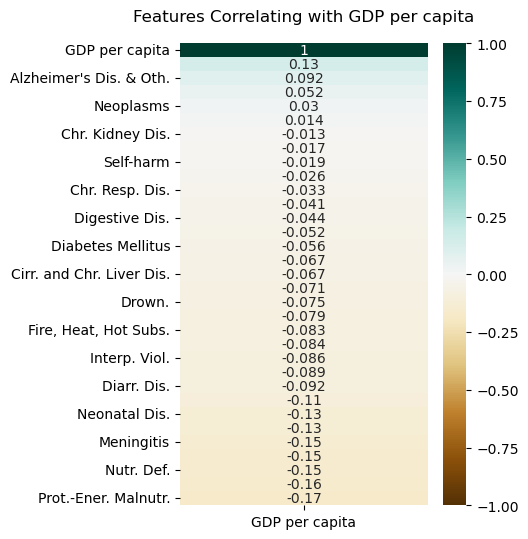

In [62]:
# Check the relation between causes of death and GDP per capita
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(sub_merged.corr()[['GDP per capita']].sort_values(by='GDP per capita', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with GDP per capita', fontdict={'fontsize':12}, pad=16);

As illustrated there isn't a correlation between the two variables.

### I'd expect to see a negatife correlation between the total GDP of a country and the number of deaths from preventable diseases. 

In [64]:
# Calculate total GDP
df_merged['Total GDP'] = df_merged['GDP per capita'] * df_merged['Population']
df_merged.head()

,Country,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,...,Prot.-Ener. Malnutr.,Road Inj.,Chr. Resp. Dis.,Cirr. and Chr. Liver Dis.,Digestive Dis.,"Fire, Heat, Hot Subs.",Acute Hep.,GDP per capita,Population,Total GDP
0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,4130,...,1932,7379,6969,3304,6367,451,2482,543.303042,29185507.0,1.585657e+10
1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,1805,7432,6916,3318,6370,448,2365,591.162759,30117413.0,1.780429e+10
2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,1667,7494,6878,3353,6398,445,2264,641.871479,31161376.0,2.000160e+10
3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,4379,...,1651,8054,6859,3413,6476,460,2204,637.165523,32269589.0,2.056107e+10
4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,4420,...,1579,8087,6851,3454,6522,463,2134,613.856689,33370794.0,2.048489e+10


In [65]:
sub_merged2=df_merged[['Meningitis', 'Alzheimer\'s Dis. & Oth.',
       'Parkinson\'s Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population','Total GDP']]

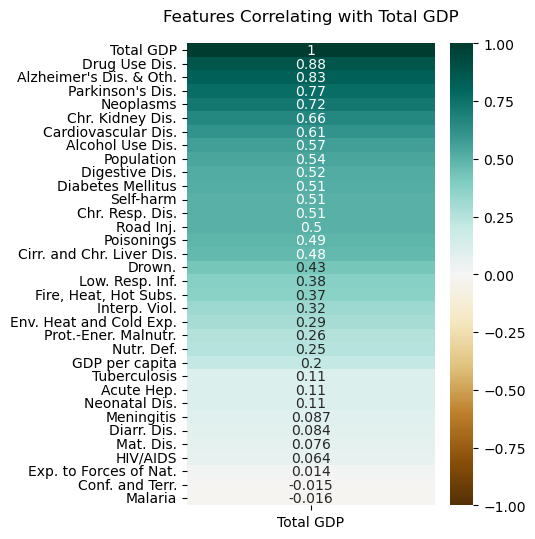

In [86]:
# Plot figure to visulize the correlation between total gdp and the number of deaths from preventable diseases.¶
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(sub_merged2.corr()[['Total GDP']].sort_values(by='Total GDP', ascending=False), vmin=-1, vmax=1, xticklabels=True, yticklabels=True,annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total GDP', fontdict={'fontsize':12}, pad=16);

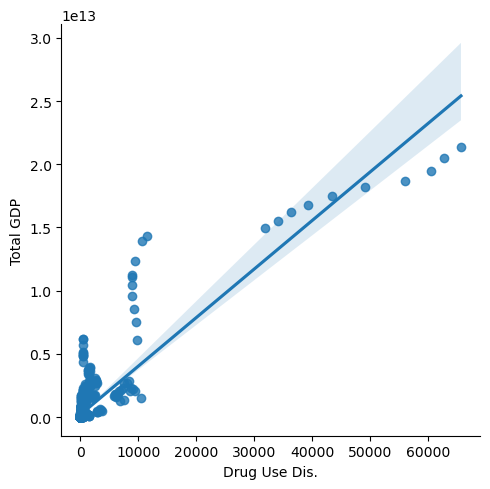

In [87]:
sns.lmplot(x='Drug Use Dis.',y='Total GDP',data=sub_merged2)

The dots of lower and higher GDP are clustered closer to line. For middle group 0.5-1.0 the correlation is not very strong.

<Axes: xlabel='Total GDP', ylabel='Count'>

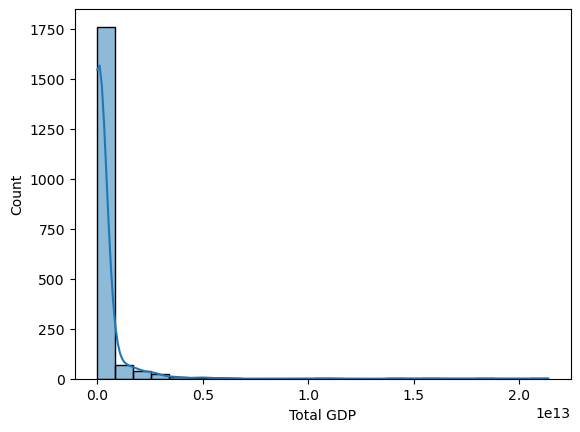

In [124]:
sns.histplot(df_merged['Total GDP'], bins = 25, kde = True)

In [169]:
sub_merged2.loc[sub_merged2['Total GDP'] < 0.2e13, 'GDP category'] = 'Low GDP'

In [170]:
sub_merged2.loc[(sub_merged2['Total GDP'] >= 0.2e13) & (sub_merged2['Total GDP'] < 0.6e13), 'GDP category'] = 'Middle GDP'

In [174]:
sub_merged2.loc[sub_merged2['Total GDP'] >= 0.6e13, 'GDP category'] = 'High GDP'

In [175]:
sub_merged2['GDP category'].value_counts()

GDP category
Low GDP       1845
Middle GDP      61
High GDP        22
Name: count, dtype: int64

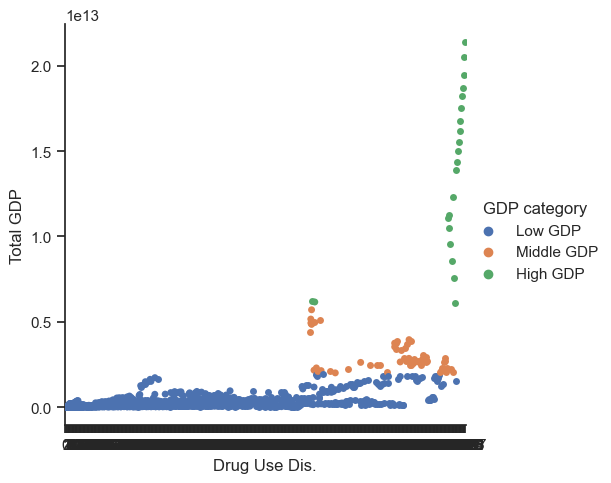

In [176]:
# Create a categorical plot using the GDP category

sns.set(style="ticks")
gdp_corr = sns.catplot(x='Drug Use Dis.', y='Total GDP', hue='GDP category', data=sub_merged2)

Deaths from drug use disorders are observed in all countries regardless of their total GDP; however, in countries with a high GDP, mortality attributed to drug use is consistently the highest. This phenomenon may be explained by factors such as wealthier countries having higher rates of prescription drug use, contributing to the potential for misuse and addiction. Additionally, wealthier countries may have more accurate reporting and tracking of drug-related deaths. Income inequality may also play a role, contributing to social issues that influence the occurrence of deaths related to drug use disorders.

# Hypotheses

1. As GDP per capita increases, there might be shifts in the leading causes of death from infectious diseases to lifestyle-related diseases.
2. The likelihood of an individual dying from a disease is higher than the chances dying from an external factor. 